In [ ]:
# Importamos las liberias y demás cosas que vamos a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from pandas.core.reshape.encoding import from_dummies
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn. model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn. tree import DecisionTreeClassifier
from sklearn. tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn. metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import graphviz

1)Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [ ]:

#Traigo el archivo csv desde el repo de github.
fds : pd.DataFrame = pd.read_csv('https://raw.githubusercontent.com/Lucasgrimb/ModelosPredictivos/main/ford.csv')
#Uso solo 10000 lineas
fds_sample = fds.sample(n=10000)
#Chequeo dimensiones de fds_sample
fds_sample.shape

(10000, 9)

2)Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.








         model  year  price transmission  mileage fuelType  tax   mpg  \
13121   Fiesta  2017  10500    Semi-Auto    19733   Petrol  145  47.9   
14435   Fiesta  2018   9999       Manual     9813   Petrol  145  64.2   
17162    Focus  2016   9990    Automatic    23700   Petrol  165  44.8   
1291      Edge  2017  20698       Manual    17381   Diesel  150  47.9   
4727       Ka+  2018   7600       Manual    11834   Petrol  145  57.7   

       engineSize  
13121         1.6  
14435         1.1  
17162         1.6  
1291          2.0  
4727          1.2  
               year         price        mileage           tax           mpg  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2016.861100  12264.909400   23373.932300    113.096000     57.902990   
std        2.074858   4748.830613   19494.151752     62.395826      9.954042   
min     2002.000000    675.000000       1.000000      0.000000     20.800000   
25%     2016.000000   9000.000000    9987

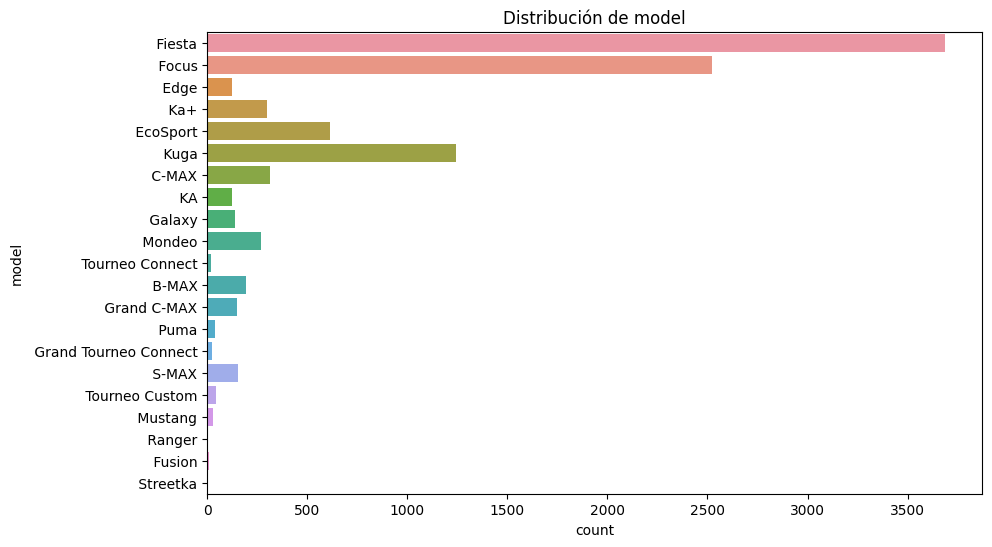

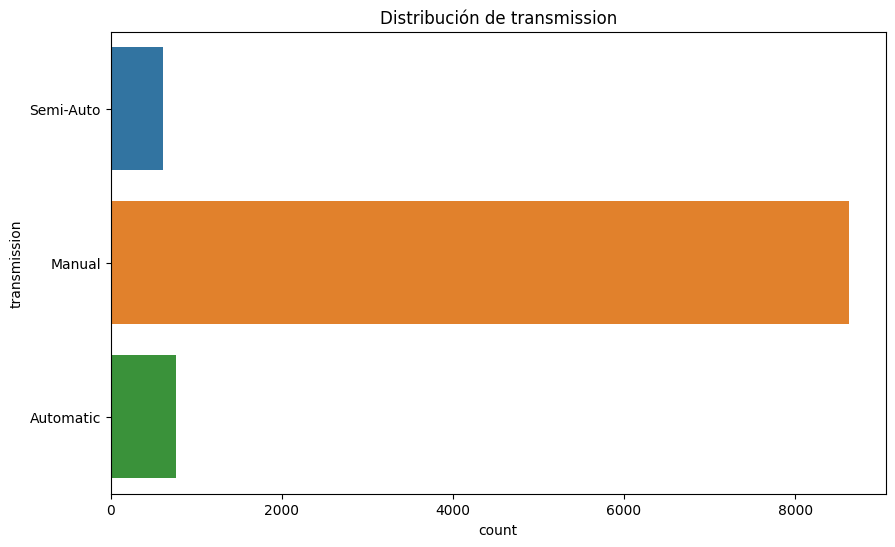

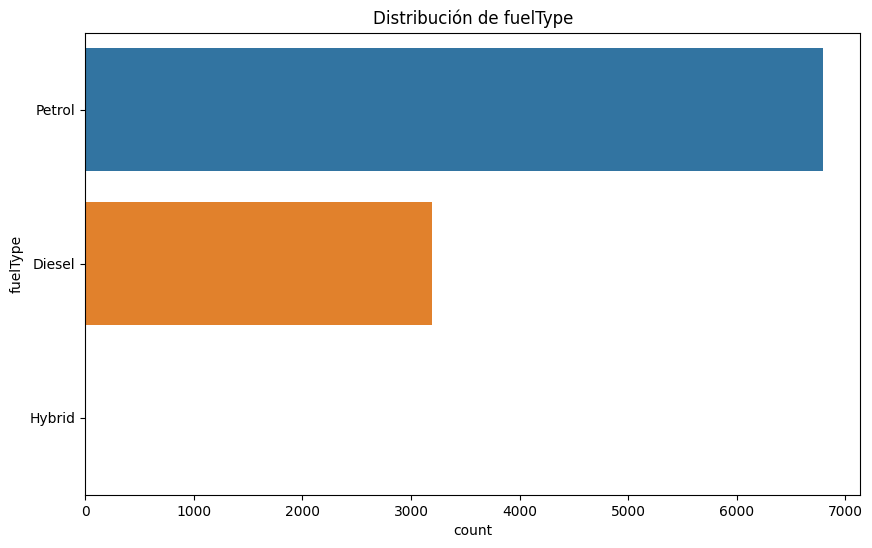

In [ ]:
# Visualizar las primeras filas del dataset para tener una idea general
print(fds_sample.head())
# Estadísticas descriptivas básicas
print(fds_sample.describe())
#  visualizo distribución de variables categóricas
cat_features = fds_sample.select_dtypes(exclude=[np.number]).columns.tolist()
for feature in cat_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data=fds_sample, y=feature)
    plt.title(f'Distribución de {feature}')
    plt.show()

3)Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [ ]:

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Convertir la columna 'model'
le.fit(fds_sample['model'])
fds_sample['model'] = le.transform(fds_sample['model'])

# Convertir la columna 'transmission'
le.fit(fds_sample['transmission'])
fds_sample['transmission'] = le.transform(fds_sample['transmission'])

# Convertir la columna 'fuelType'
le.fit(fds_sample['fuelType'])
fds_sample['fuelType'] = le.transform(fds_sample['fuelType'])

# Ver el DataFrame transformado
print(fds_sample)


       model  year  price  transmission  mileage  fuelType  tax   mpg  \
13121      4  2017  10500             2    19733         2  145  47.9   
14435      4  2018   9999             1     9813         2  145  64.2   
17162      5  2016   9990             0    23700         2  165  44.8   
1291       3  2017  20698             1    17381         0  150  47.9   
4727      11  2018   7600             1    11834         2  145  57.7   
...      ...   ...    ...           ...      ...       ...  ...   ...   
6844       4  2018  11500             1    10820         2  145  56.5   
6836       5  2018  14298             1     3037         2  145  57.7   
10105     12  2019  19995             1     2790         2  150  35.3   
10993      5  2017  12499             2    16943         2  125  51.4   
3620      13  2015   8470             1    73991         0   30  65.7   

       engineSize  
13121         1.6  
14435         1.1  
17162         1.6  
1291          2.0  
4727          1.2  
...

4)Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [ ]:
#datos entrada
X = fds_sample.drop('price', axis=1)
#datos salida
y = fds_sample['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

5)Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.
Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.



In [ ]:
# Entrenar un modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones
lr_predictions = lr.predict(X_test)

# Evaluar el modelo
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Mean Squared Error (MSE) para Regresión Lineal: {lr_mse}")



Mean Squared Error (MSE) para Regresión Lineal: 7767010.067747636


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predicciones
dt_predictions = dt.predict(X_test)

# Evaluar el modelo
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Mean Squared Error (MSE) para Árbol de Decisión: {dt_mse}")

Mean Squared Error (MSE) para Árbol de Decisión: 3034240.4894861113


In [ ]:
# cross_val_score para evaluar el rendimiento del modelo
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

print(f"Promedio MSE para Regresión Lineal con Validación Cruzada: {-lr_scores.mean()}")
print(f"Promedio MSE para Árbol de Decisión con Validación Cruzada: {-dt_scores.mean()}")

Promedio MSE para Regresión Lineal con Validación Cruzada: 5700741.0076939445
Promedio MSE para Árbol de Decisión con Validación Cruzada: 2833911.302017361




1. **¿Qué formas tienen de evaluar los resultados de cada árbol de decisión?**
   
   Utilizamos el Mean Squared Error (MSE) como métrica para evaluar la precisión de las predicciones hechas por el árbol de decisión. Además, hicimos uso de la validación cruzada con 5 pliegues (5-Fold Cross-Validation) para obtener una estimación más robusta del rendimiento del modelo en datos no vistos. La validación cruzada proporciona múltiples medidas del MSE en diferentes subconjuntos del conjunto de datos, lo que nos ayuda a comprender la variabilidad del rendimiento del modelo.

2. **¿Cómo eligen "el mejor árbol"?**
   
   Para elegir "el mejor árbol", nos fijaríamos en la métrica de rendimiento (en este caso, MSE) en el conjunto de prueba y, posiblemente, en el promedio de MSE obtenido a través de la validación cruzada. El modelo con el menor MSE, en general, se consideraría "el mejor" ya que tiene el menor error cuadrado medio en sus predicciones. Sin embargo, también es importante considerar otros factores, como la complejidad del árbol, para evitar sobreajuste.

3. **¿Cómo se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**
   
   Basándonos en el código proporcionado:

   - Regresión Lineal: El MSE para el modelo de regresión lineal en el conjunto de prueba es \(lr\_mse\). Además, el MSE promedio obtenido a través de la validación cruzada para el modelo de regresión lineal es \(-lr\_scores.mean()\).
   - Árbol de Decisión: El MSE para el modelo de árbol de decisión en el conjunto de prueba es \(dt\_mse\). Además, el MSE promedio obtenido a través de la validación cruzada para el modelo de árbol de decisión es \(-dt\_scores.mean()\).

   Comparando estos resultados, podemos determinar cuál de los modelos es más preciso basándonos en el MSE: un menor MSE indica un mejor rendimiento. Sin embargo, también debemos considerar la varianza en los scores de validación cruzada, ya que un modelo con alta variabilidad puede no ser confiable en la práctica.

   En resumen, mientras que ambos modelos se evalúan utilizando MSE y validación cruzada, es esencial mirar el contexto y las diferencias en sus resultados para determinar cuál modelo es preferible para el problema en cuestión.

6)Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.
Responder las mismas preguntas que en el punto 5 para este caso.

In [ ]:

X = fds_sample.drop('transmission', axis=1)
y = fds_sample['transmission']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de Regresión Logística
logreg = LogisticRegression(max_iter=10000) # Aumento de iteraciones
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy para Regresión Logística:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred, zero_division=1))

# Validación Cruzada usando StratifiedKFold
cv = StratifiedKFold(n_splits=5)
scores_logreg = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
print("Promedio de Accuracy para Regresión Logística con Validación Cruzada:", scores_logreg.mean())


Accuracy para Regresión Logística: 0.8525
Reporte de Clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.20      0.06      0.09       153
           1       0.87      0.98      0.92      1726
           2       0.18      0.02      0.03       121

    accuracy                           0.85      2000
   macro avg       0.42      0.35      0.35      2000
weighted avg       0.78      0.85      0.81      2000

Promedio de Accuracy para Regresión Logística con Validación Cruzada: 0.8620000000000001


In [ ]:
# Modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print("\nAccuracy para Árbol de Decisión:", accuracy_score(y_test, y_pred_dt))
print("Reporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))

# Validación Cruzada para el Árbol de Decisión
scores_dt = cross_val_score(dt_classifier, X, y, cv=cv, scoring='accuracy')
print("Promedio de Accuracy para Árbol de Decisión con Validación Cruzada:", scores_dt.mean())



Accuracy para Árbol de Decisión: 0.9265
Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       153
           1       0.98      0.98      0.98      1726
           2       0.54      0.56      0.55       121

    accuracy                           0.93      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.93      0.93      0.93      2000

Promedio de Accuracy para Árbol de Decisión con Validación Cruzada: 0.9254999999999999




1. **¿Qué formas tienen de evaluar los resultados de cada árbol de decisión?**

   Los resultados del árbol de decisión se evalúan utilizando varias métricas que derivan del informe de clasificación. Las métricas clave incluyen:
   
   - **Accuracy (Precisión)**: Mide la proporción de predicciones correctas en todos los casos.
   - **Precision**: Se refiere a la proporción de verdaderos positivos frente a la suma de verdaderos y falsos positivos. Es una indicación de cuán confiables son las predicciones positivas del modelo.
   - **Recall (Sensibilidad)**: Se refiere a la proporción de verdaderos positivos frente a la suma de verdaderos positivos y falsos negativos. Indica qué proporción de los positivos reales fue identificada correctamente.
   - **F1-Score**: Es la media armónica entre la precisión y el recall y proporciona una métrica que combina ambos valores en uno.
   
   Además, utilizamos la validación cruzada para obtener una estimación más robusta del rendimiento del árbol en datos no vistos.

2. **¿Cómo eligen "el mejor árbol"?**

   Para elegir "el mejor árbol", se considera el rendimiento del modelo en el conjunto de prueba, específicamente el valor de "accuracy". Además, el promedio de accuracy obtenido a través de la validación cruzada puede ofrecer una indicación más generalizada del rendimiento del árbol. Sin embargo, si tuviéramos varios árboles para comparar, no solo nos fijaríamos en el accuracy. También consideraríamos otras métricas, como precision, recall y f1-score, especialmente si las clases están desbalanceadas. También es esencial tener en cuenta la complejidad del árbol (profundidad, número de nodos) para evitar el sobreajuste.

3. **¿Cómo se comparan los resultados de los modelos de regresión logística y de árbol de decisión?**

   - **Regresión Logística**:
     - Accuracy: 0.8555
     - Precisión, Recall, y F1-Score varían según la clase, con valores de precisión de 0.11, 0.87 y 0.25 para las clases 0, 1 y 2, respectivamente.
     - Promedio de Accuracy con Validación Cruzada: 0.8643
   
   - **Árbol de Decisión**:
     - Accuracy: 0.9295
     - Precisión, Recall, y F1-Score también varían según la clase, pero en general son más altos que los del modelo de regresión logística, con valores de precisión de 0.61, 0.99 y 0.53 para las clases 0, 1 y 2, respectivamente.
     - Promedio de Accuracy con Validación Cruzada: 0.9224

   En resumen, el modelo de Árbol de Decisión parece superar al modelo de Regresión Logística en términos de accuracy y otras métricas para este conjunto de datos. La mejora en las métricas sugiere que el Árbol de Decisión puede ser más adecuado para este problema en particular, aunque es crucial realizar un análisis más profundo y considerar otros aspectos como la interpretación del modelo, el riesgo de sobreajuste y la naturaleza del conjunto de datos antes de decidir cuál modelo es "mejor".

7)
**Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?**

*K-Fold Cross Validation:*

Ventajas:
Más preciso que el método de división de train/test.
Hace uso eficiente de los datos ya que cada observación se utiliza tanto para el entrenamiento como para la prueba.
Desventajas:
No siempre es ideal para datos que están desequilibrados en términos de clases.
Requiere más tiempo computacional ya que el modelo se entrena K veces.

*Stratified K-Fold Cross Validation:*

Ventajas:
Cada pliegue es una buena representación de todo el conjunto de datos en términos de distribución de clases. Es especialmente útil para datos desequilibrados.
Desventajas:
Al igual que K-Fold, es computacionalmente más caro que una simple división de train/test.
Leave-One-Out Cross Validation (LOOCV):

Ventajas:
Hace el máximo uso de los datos.
Menos sesgo ya que se entrena en casi todo el conjunto de datos.
Desventajas:
Muy caro computacionalmente, especialmente para conjuntos de datos grandes.
Puede llevar a estimaciones de varianza más altas debido a que se entrena con casi todos los datos.

*Leave-P-Out Cross Validation:*

Ventajas:
Proporciona una evaluación exhaustiva al considerar todas las subconjuntos de p datos.
Desventajas:
Aún más caro computacionalmente que LOOCV.
Time-Series Cross-Validation:

Ventajas:
Ideal para series temporales donde la estructura temporal es importante.
Desventajas:
No se puede hacer aleatoriamente ya que rompería la estructura temporal.
Puede no ser eficiente si hay patrones estacionales o tendencias a largo plazo.

*Group K-Fold Cross Validation:*

Ventajas:
Ideal para conjuntos de datos donde las observaciones tienen grupos, y se desea que el mismo grupo no aparezca en diferentes pliegues.
Desventajas:
Se requiere un conocimiento previo sobre la estructura de grupo de los datos.

*Shuffle Split Cross Validation:*

Ventajas:
Permite control sobre el número de iteraciones y el tamaño de la prueba/train.
Puede ser más rápido que K-Fold.
Desventajas:
Menos preciso que K-Fold si no se eligen correctamente el número de iteraciones y el tamaño del conjunto.

8)**Conclusión**:

En este proyecto, exploramos un dataset, visualizamos las relaciones entre datos y construimos modelos predictivos. Aprendimos la importancia de analizar y validar estos modelos adecuadamente. Aunque el aprendizaje automático puede parecer complicado al principio, con práctica y estudio, pudimos comprender sus fundamentos. Este trabajo nos dio una buena introducción a la ciencia de datos, un campo bastante amplio e interesante.

**Bonus**

In [ ]:
#datos entrada
X = fds_sample.drop('price', axis=1)
#datos salida
y = fds_sample['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciación y entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones y evaluación
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Mean Squared Error (MSE) para Regresión Lineal: {lr_mse}")

# Hiperparámetros a considerar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)

# Uso de GridSearchCV para búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

# Predicciones y evaluación
dt_predictions = best_dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Mean Squared Error (MSE) para Árbol de Decisión: {dt_mse}")

# Regresión Lineal
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print(f"Promedio MSE para Regresión Lineal con Validación Cruzada: {-lr_scores.mean()}")

# Árbol de Decisión
dt_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print(f"Promedio MSE para Árbol de Decisión con Validación Cruzada: {-dt_scores.mean()}")


Mean Squared Error (MSE) para Regresión Lineal: 7047622.330177207
Mean Squared Error (MSE) para Árbol de Decisión: 2264495.482784589
Promedio MSE para Regresión Lineal con Validación Cruzada: 5903178.30428859
Promedio MSE para Árbol de Decisión con Validación Cruzada: 2249263.713477783


In [ ]:
X = fds_sample.drop('transmission', axis=1)
y = fds_sample['transmission']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Regresión Logística
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy para Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Árbol de Decisión
#  GridSearch para optimizar hiperparámetros
params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

y_pred_tree = best_tree.predict(X_test)
print("Accuracy para Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy para Regresión Logística: 0.8625
              precision    recall  f1-score   support

           0       0.42      0.07      0.12       153
           1       0.87      0.99      0.93      1726
           2       0.00      0.00      0.00       121

    accuracy                           0.86      2000
   macro avg       0.43      0.35      0.35      2000
weighted avg       0.78      0.86      0.81      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy para Árbol de Decisión: 0.9245
              precision    recall  f1-score   support

           0       0.65      0.55      0.60       153
           1       0.97      0.99      0.98      1726
           2       0.54      0.50      0.52       121

    accuracy                           0.92      2000
   macro avg       0.72      0.68      0.70      2000
weighted avg       0.92      0.92      0.92      2000

